This is ganna be a small simulation of quantum entangelment

In [1]:
from qiskit import * 

Create two classic bits

In [2]:
cr = ClassicalRegister(2)

Create two Qbits

In [3]:
qr = QuantumRegister(2)

Now we should create a simple circuit

In [4]:
circuit = QuantumCircuit(qr, cr)

now visualize circuit using matplotlib

In [5]:
%matplotlib inline

In [6]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

###### as  we can see there is two qbits and two classic bits 
###### now we shuold add a hadmard and control_NOT oprator to simulate entangelment:

In [7]:
# effect hadmard opreator to circuit (to one of qbits) 
circuit.h(qr[0])

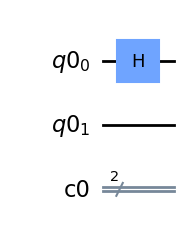

In [8]:
# visuialize 
circuit.draw(output = "mpl")

In [9]:
# now we effect CONTROLED_NOT opreator to our circuit
# this opraetor effect on one state and convert it to another state

circuit.cx(qr[0], qr[1])# control: first qubit qr[0], and target is seconde qbit qr[1]


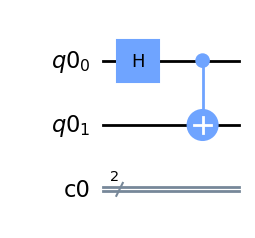

In [10]:
circuit.draw(output = "mpl")

now we are gonna measurment qubits in our circuit. as we know when you measur a qbit, it will act like a single bit

In [11]:
circuit.measure(qr, cr)

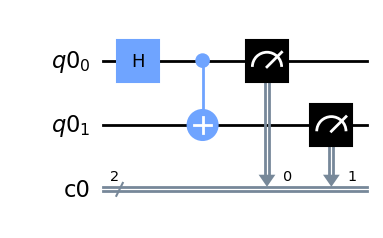

In [12]:
circuit.draw(output = "mpl")

## Now we are gonna run this circuit Localy on my computer 
### if run was alright we could run it on quantum computer of IBM

In [13]:
simulator = Aer.get_backend("qasm_simulator") # qasm is name of the simulator

In [14]:
# Now we create a simulator, we should execute it 
result = execute(circuit, backend= simulator).result() # (circuite, simulator)

In [32]:
from qiskit.tools.visualization import plot_histogram

In [ ]:
sum(counts.values())

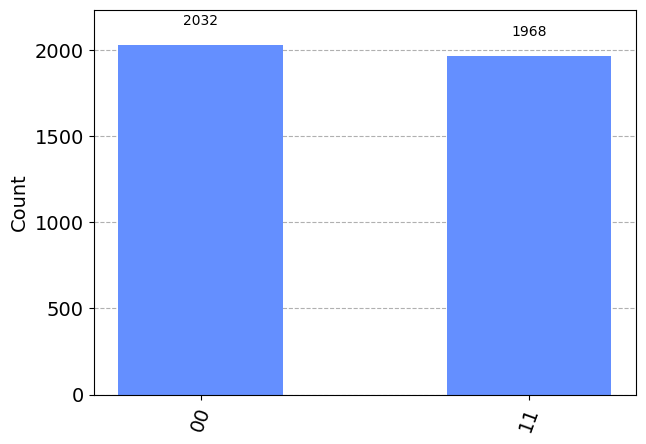

In [31]:
plot_histogram(result.get_counts(circuit))

this is a ideal simulator so we got a almost 50 - 50 probability for each state

### now we are going to run our code on IBM computer 

first we should load our account 

In [17]:
# import token and identify my account

TOKEN = 'Your token'
IBMQ.save_account(TOKEN)
IBMQ.load_account()

C:\Users\Saeed\AppData\Local\Temp\ipykernel_18340\1537863040.py:4: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(TOKEN)
C:\Users\Saeed\AppData\Local\Temp\ipykernel_18340\1537863040.py:4: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(TOKEN)
configrc.store_credentials:WARNING:2023-03-23 00:44:06,906: Credentials already present. Set ov

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [20]:
provider = IBMQ.get_provider('ibm-q')

In [22]:
qcomp = provider.get_backend('ibmq_qasm_simulator')

In [23]:
job = execute(circuit, backend=qcomp)

In [24]:
from qiskit.tools.monitor import job_monitor

In [25]:
job_monitor(job)

Job Status: job has successfully run


In [26]:
result = job.result()

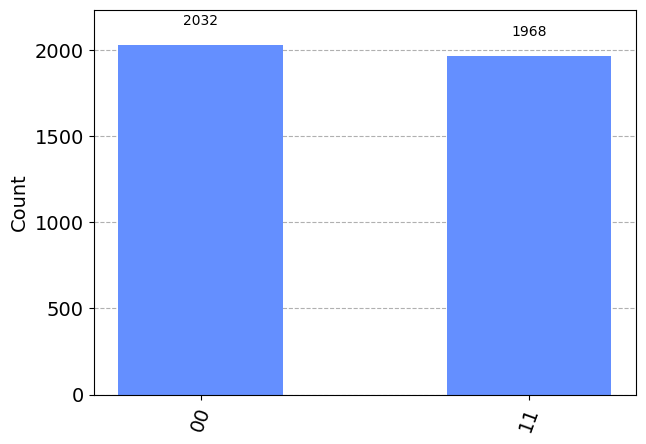

In [30]:
plot_histogram(result.get_counts(circuit))